### DSCI 100 008 Final Project
# Title: What it takes to be Ballin': An analysis of NBA player statistics and their effect on salary.

### Group 33: Paul Daoud | Ahnaf Kabir | Shawn Gabriel | Jackie Crowley

### Introduction

### Method and Results

#### Importing Libraries
We used functions from the `tidyverse` library to manipulate data frames and use KNN algorithms. 

In [1]:
# importing libraries
library(tidyverse)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Next, we want to set the seed for reproducability, and load our dataset into the NBA_salary_data object.

In [2]:
set.seed(1234)

NBA_salary_data <- read.csv("nba_players_stats_with_salary.csv")
NBA_salary_data

X,Player.Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV.,USG.,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,...,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6
6,Kawhi Leonard,42492492,SF,31,LAC,52,50,33.6,8.6,...,8.1,27.0,4.9,2.2,7.1,0.194,5.1,0.9,6.1,3.5
7,Paul George,42492492,SF,32,LAC,56,56,34.6,8.2,...,13.4,29.5,2.3,2.3,4.6,0.114,2.4,0.3,2.8,2.3
8,Giannis Antetokounmpo,42492492,PF,28,MIL,63,63,32.1,11.2,...,13.2,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4
9,Damian Lillard,42492492,PG,32,POR,58,58,36.3,9.6,...,11.7,33.8,8.2,0.8,9.0,0.205,8.3,-1.2,7.1,4.9


We have successfully loaded our dataset, now we can make some predictions about which 5 statistics will most likely be good predictors for salary, and explore those further.

For example, we can generally assume that stats such as minutes played or steals per game will not be as influential on salary as points per game or win shares. 

Our dataset has some columns containing complex statistics (such as win shares, which takes a lot of data science knowledge to even produce), which we will dive into as we go. This will ensure that even viewers who are not familiar with NBA or even basketball will be able to understand and full appreciate. 

Let's begin by exploring an obvious relationship, the correlation between Points Per Game and Salary.

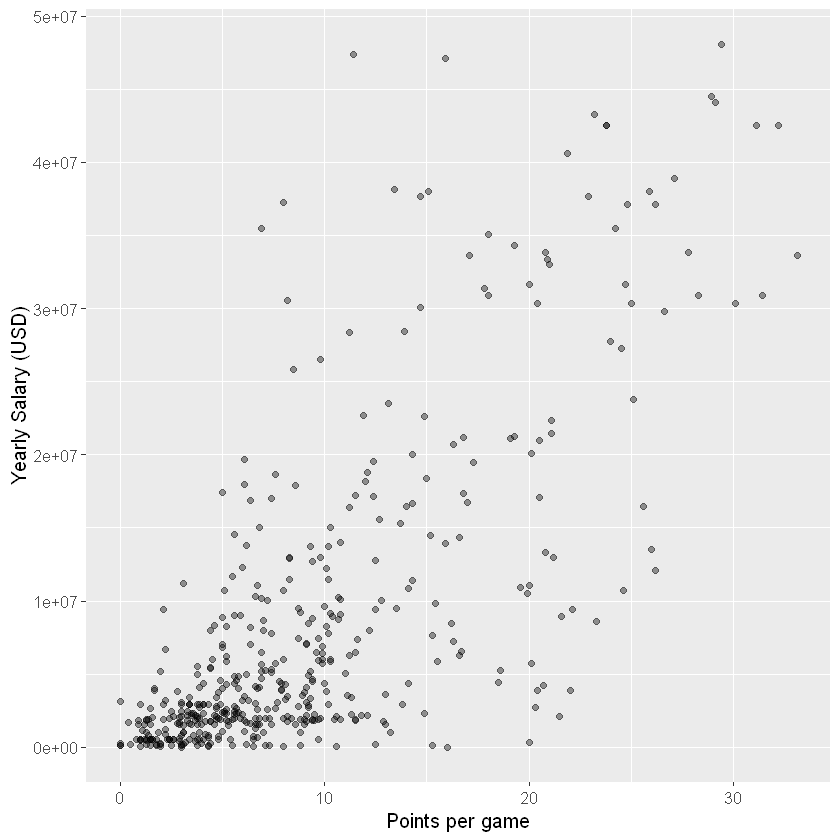

In [15]:
ppg_correlation <- ggplot(NBA_salary_data, aes(x = PTS, y = Salary)) +
geom_point(alpha = 0.4) +
xlab("Points per game") +
ylab("Yearly Salary (USD)") +
theme(text = element_text(size = 12))

ppg_correlation

We can see from the plot that there is a somewhat linear relationship between points per game and yearly salary of NBA players. Since the team with more points ultimately wins games, this makes sense. However, in order to see which statistic has the highest correlation, we need to create a correlation matrix. 

However, we don't want to run it with ALL the variables, as some will very likely not have any correlation at all (such as steal percentage). We must first select the top 6 best guesses and then create a correlation matrix. 

In [25]:
best_guesses <- NBA_salary_data[c("Age", "GS", "Salary", "PTS")]

cor_matrix <- cor(best_guesses, use = "complete.obs")
cor_matrix

,Age,GS,Salary,PTS
Age,1.0000000,0.0990717,0.4160716,0.1028276
GS,0.0990717,1.0000000,0.6022673,0.7470972
Salary,0.4160716,0.6022673,1.0000000,0.7275967
PTS,0.1028276,0.7470972,0.7275967,1.0000000


### Analysis and

In [ ]:
##Test commit

### Discussion

### References